<h1>SLR(Simple Linear Regression)

<h2> Step 1: Import necessary libraries <br>
Step 2: Define the dataset (Experience in years and corresponding Salary in $1000s) <br>
Step 3: Creating a Linear Regression Model <br>
Step 4: Training the model using data set <br>
Step 5: Get the values of slope and intercept from the trained model<br>
Step 6: Display the equation of the line <br>
Step 7: Predit values using the model <br>
Step 8: Plot the regression line <br>
step 9: Prediction Features<br>
 </h2>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

ModuleNotFoundError: No module named 'statsmodels'

<h3>Step 2: Define the dataset (Experience in years and corresponding Salary in $1000s)</h3>

In [ ]:
np.random.seed(42)  # Ensuring reproducibility of random noise

X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]).reshape(-1, 1)  # Independent variable (Experience)
true_salaries = np.array([30, 35, 40, 45, 50, 55, 60, 65, 70, 75])  # True salary values

Adding some random noise to salaries to reduce accuracy

In [ ]:
noise = np.random.normal(0, 5, size=true_salaries.shape)  # Adding Gaussian noise (mean=0, std=5)
Y = true_salaries + noise  # Final dependent variable with noise

In [ ]:
Y

array([32.48357077, 34.30867849, 43.23844269, 52.61514928, 48.82923313,
       53.82931522, 67.89606408, 68.83717365, 67.65262807, 77.71280022])

Create linear regression model and assign that linear regression to model

In [ ]:
model=LinearRegression()

Train the model using Dataset

In [ ]:
model.fit(X,Y)

LinearRegression()

In [ ]:
model.intercept_

27.430065779800533

In [ ]:
print(model.coef_[0])


4.965498141580592


In [ ]:
def PrintEquation():
    print(f"Y={model.coef_[0]:.2f}X + {model.intercept_:.2f}")
PrintEquation()

Y=4.97X + 27.43


Predict Values using the Model

In [ ]:
Y_pred=model.predict(X)

In [ ]:
Y_pred

array([32.39556392, 37.36106206, 42.3265602 , 47.29205835, 52.25755649,
       57.22305463, 62.18855277, 67.15405091, 72.11954905, 77.0850472 ])

Model evolution Matrix <br>
1. Mean Square Error <br>
2. Root Mean Square Error <br>

MSE calculates the average of the squared differences between actual and predicted values.
It tells us how far the model’s predictions are from the actual values.

In [ ]:
mse=mean_squared_error(Y,Y_pred)
print(f"Mean Square Error: {mse}")

Mean Square Error: 11.751853009895182


Mean Absolute Error:<br>
MAE measures the average absolute difference between actual and predicted values.
Unlike MSE, it doesn’t square the errors, so it treats all errors equally.


In [ ]:
mae=mean_absolute_error(Y,Y_pred)
print(f"Mean Absolute Error: {mae}")

Mean Absolute Error: 2.868273465573678


Root Mean Squared Error: <br>RMSE is just the square root of MSE.
Since MSE is squared, RMSE brings it back to the same unit as the data.

In [ ]:
rmse=np.sqrt(mse)
print(f"{rmse:.2f}")

3.43


R-Squared Error:<br>What is it?
𝑅
2
R
2
  measures how well the model explains the variance in the data.
It tells us what percentage of the data’s behavior the model captures.

In [ ]:
r2=r2_score(Y,Y_pred)
print(f"{r2:.2f}")

0.95


Adjusted R Square:<br>
Adjusted
𝑅
2
R
2
  fixes a problem with
𝑅
2
R
2
 :
Adding more variables can falsely increase
𝑅
2
R
2
 , even if they don’t help.
It adjusts for the number of predictors (features) in the model.

In [ ]:
n=len(Y)
p=1
adj_r2=1-((1-r2)*(n-1)/(n-p-1))
adj_r2

0.9385549786123039

Plot the Actual Data Points

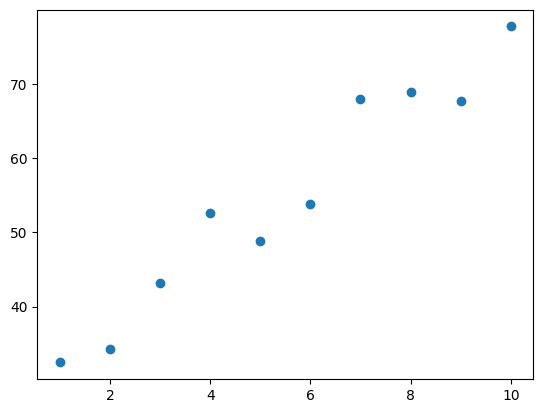

In [ ]:
plt.scatter(X,Y)

<ipython-input-20-3e77114d10a9>:1: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


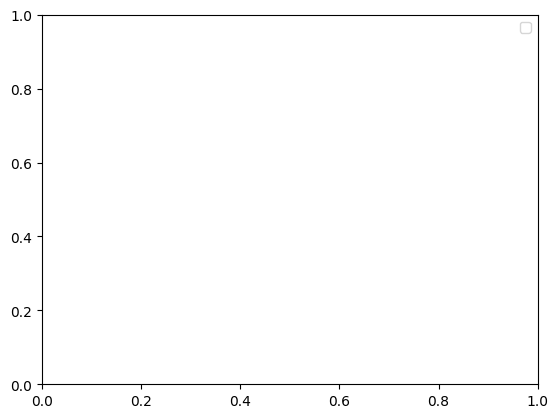

In [ ]:

plt.xlabel('')
plt.legend()
plt.show()

In [ ]:
while True:
    try:
        exp = float(input("\nEnter years of experience to predict salary (or -1 to exit): "))
        if exp == -1:
            break  # Exit the Loop
        predicted_salary = model.predict(np.array([[exp]]))[0]
        print(f"Predicted Salary for {exp} years of experience: ${predicted_salary:.2f}K")
    except ValueError:
        print("Please enter a valid number!")


In [ ]:
import statsmodels.api as sm  # For OLS Regression

# Step 3: Convert data into Polynomial Features (degree 2 for quadratic relationship)

degree = 2  # You can change this for higher degrees

poly = PolynomialFeatures(degree=degree)  # Creating polynomial feature transformer

X_poly = poly.fit_transform(X)  # Transforming X to polynomial features


NameError: name 'PolynomialFeatures' is not defined

In [ ]:
# Step 3: Convert data into Polynomial Features (degree 2 for quadratic relationship)
degree = 2  # You can change this for h
poly = PolynomialFeatures(degree=degree)  # Creating polynomial feature transformer
X_poly = poly.fit_transform(X)  # Transforming X to polynomial features
from sklearn.preprocessing import PolynomialFeatures  # For polynomial transformation


In [4]:
data = {
    'Size': [1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200],
    'Bedrooms': [3, 3, 3, 4, 4, 4, 5, 5],
    'Age': [10, 15, 10, 20, 30, 15, 20, 25],
    'Price': [300000, 320000, 340000, 360000, 400000, 370000, 420000, 430000]
}

In [5]:
df = pd.DataFrame(data)

# Step: 3 Creating a Linear Regression Model


In [6]:
X = df[['Size', 'Bedrooms', 'Age']]
y = df['Price']

# Step 4: Training the model using the dataset

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# Step 5: Get the values of slope and intercept

In [10]:
slope = model.coef_
intercept = model.intercept_
print("Slope (Coefficients):", slope)
print("Intercept:", intercept)

Slope (Coefficients): [  182.01284797 -6252.67665953  1391.86295503]
Intercept: 33576.01713061787


# Step 6: Display the equation of the line

In [11]:
equation = f'Price = {slope[0]:.2f} * Size + {slope[1]:.2f} * Bedrooms + {slope[2]:.2f} * Age + {intercept:.2f}'
print("Equation of the line:", equation)

Equation of the line: Price = 182.01 * Size + -6252.68 * Bedrooms + 1391.86 * Age + 33576.02


# Step 7: Predict values using the model

In [12]:
y_pred = model.predict(X_test)
print("Predicted Prices:", y_pred)


Predicted Prices: [326916.4882227  393468.95074946]


# Step 8: Plot the regression line (using Size as X for visualization)

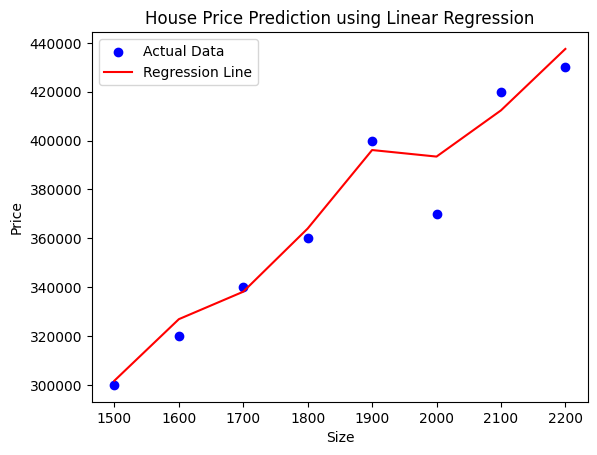

In [13]:
plt.scatter(df['Size'], df['Price'], color='blue', label='Actual Data')
plt.plot(df['Size'], model.predict(X), color='red', label='Regression Line')
plt.xlabel('Size')
plt.ylabel('Price')
plt.title('House Price Prediction using Linear Regression')
plt.legend()
plt.show()

# Step 9: Prediction Features (Predicting price for a new house)

In [17]:
new_house = np.array([[1850, 4, 10]])
predicted_price = model.predict(new_house)
print("Predicted Price for new house:", predicted_price[0])

Predicted Price for new house: 359207.7087794432


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [16]:
new_house_df = pd.DataFrame(new_house, columns=['Size', 'Bedrooms', 'Age'])
predicted_price = model.predict(new_house_df)
print("Predicted Price for new house:", predicted_price[0])

Predicted Price for new house: 359207.7087794432


In [18]:
df = pd.read_csv('/content/wine.csv')

In [19]:
df.head(10)

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


In [21]:
df.shape

(178, 14)